# Análise do histórico de uso da Netflix

Primeiro carregaremos o Tidyverse para podermos usar suas funções

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [8]:
netflix <- read_csv("NetflixViewingHistorySales.csv")

Parsed with column specification:
cols(
  Title = col_character(),
  Date = col_character()
)


#### Agora vamos modificar os dados para podermos usar a data no formato mais apropriado e adicionar informações ao data frame como: classificação se é série ou filme e o dia da semana em que o episódio/filme foi visto

In [10]:
parseia_data <- function(x) {
     data <- lubridate::dmy(x)
     if(sum(is.na(data)) > 0) {
         data <- lubridate::mdy(x)
     }
     return(data)
 }

netflix <- netflix %>% 
     mutate(
         programa = str_remove(Title, ":.*"),
         Date = parseia_data(Date),
         categoria = str_detect(Title, ": "),
         categoria = ifelse(categoria, "Séries", "Filmes/Docs."),
         mes = lubridate::month(Date, label = TRUE),
         ano = lubridate::year(Date),
         dia_sem = lubridate::wday(Date, label = TRUE),
         mes_ano = Date
     )

lubridate::day(netflix$mes_ano) <- 1

### Com o dataset tendo as informações necessárias, agora faremos um gráfico mostrando a utilização de Netflix através do tempo.
### A linha preta indica exatamente o número de episódios vistos por mês, enquanto a linha vermelha descreve o uso de Netflix por uma regressão.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


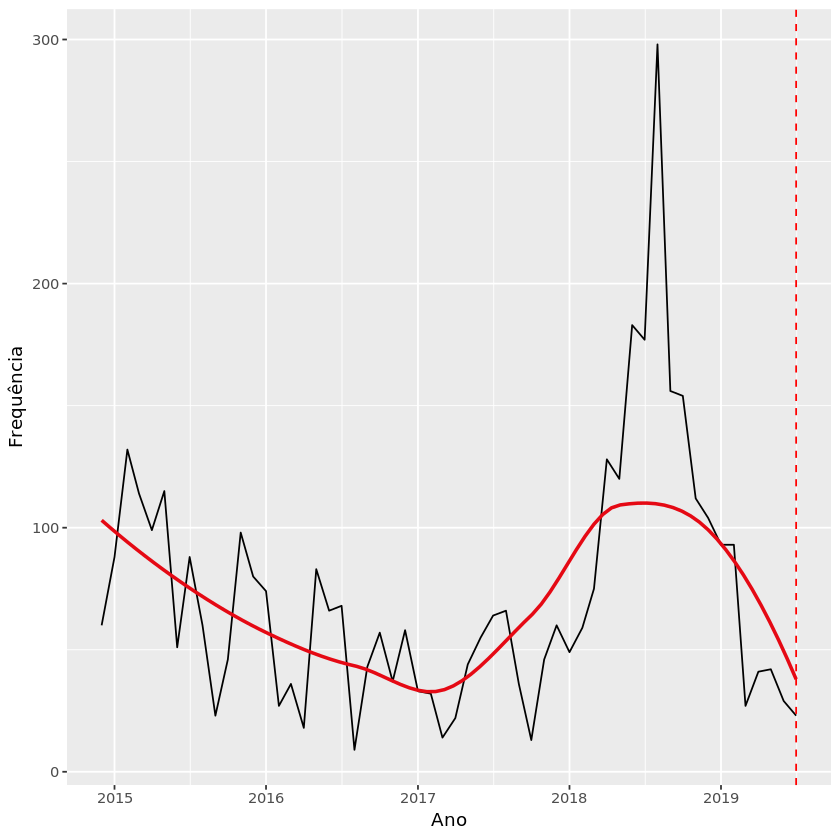

In [11]:
netflix %>% 
     count(mes_ano) %>% 
     ggplot(aes(x = mes_ano, y = n)) +
     geom_line() +
     geom_smooth(se = FALSE, color = "#e50914") +
     geom_vline(
         aes(xintercept = as.numeric(mes_ano[mes_ano == "2019-07-01"])), 
         linetype = 2, 
         color = "red"
     ) +
     labs(x = "Ano", y = "Frequência")

### Abaixo está sendo plotada a frequencia média por mês de netflix

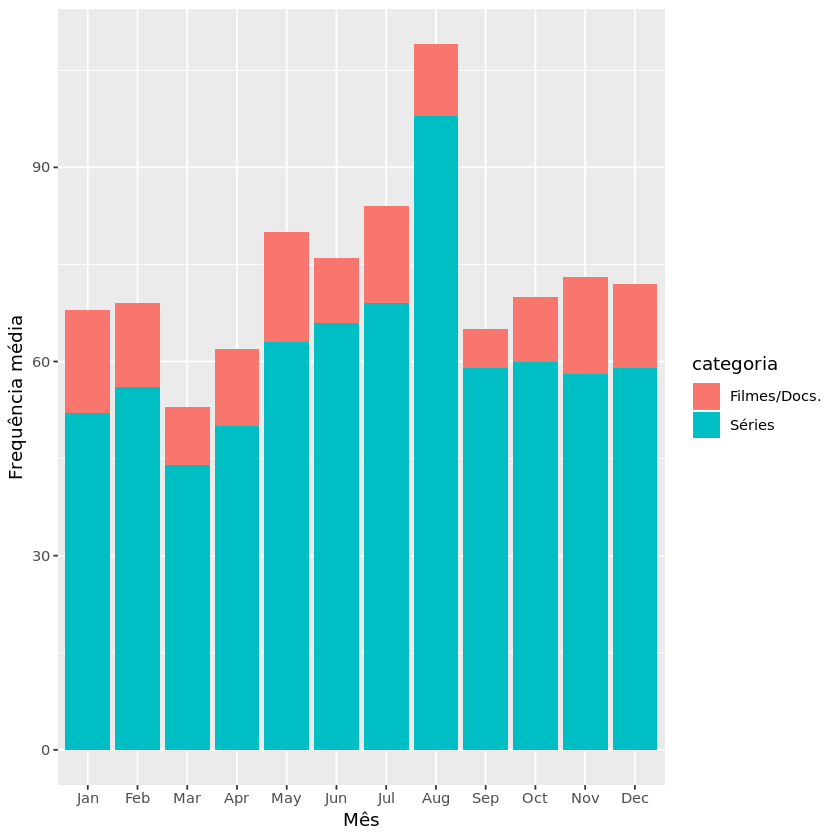

In [12]:
netflix %>% 
     count(mes, ano, categoria) %>% 
     group_by(mes, categoria) %>% 
     summarise(freq_media = mean(n)) %>% 
     mutate(freq_media = round(freq_media)) %>% 
     ggplot(aes(x = mes, y = freq_media, fill = categoria)) +
     geom_col() +
     labs(x = "Mês", y = "Frequência média")

### Abaixo temos a frequencia total de episódios assistidos por dia da semana

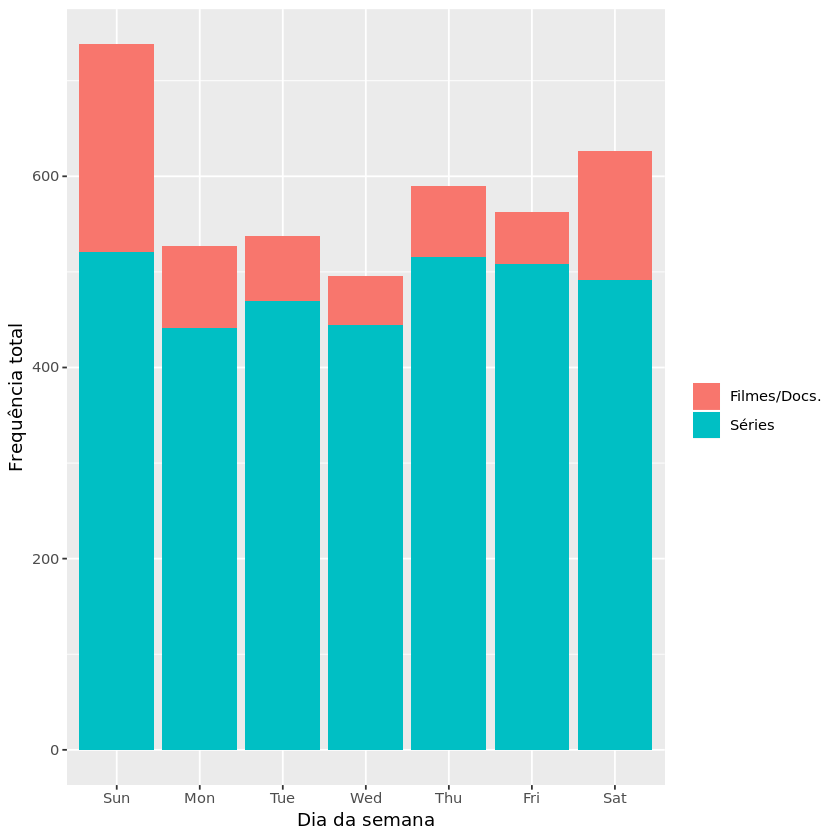

In [13]:
netflix %>% 
     count(dia_sem, categoria) %>% 
     ggplot(aes(x = dia_sem, y = n, fill = categoria)) +
     geom_col() +
     labs(x = "Dia da semana", y = "Frequência total", fill = "")

### Por fim, temos o Top 10 Séries mais assistidas da conta

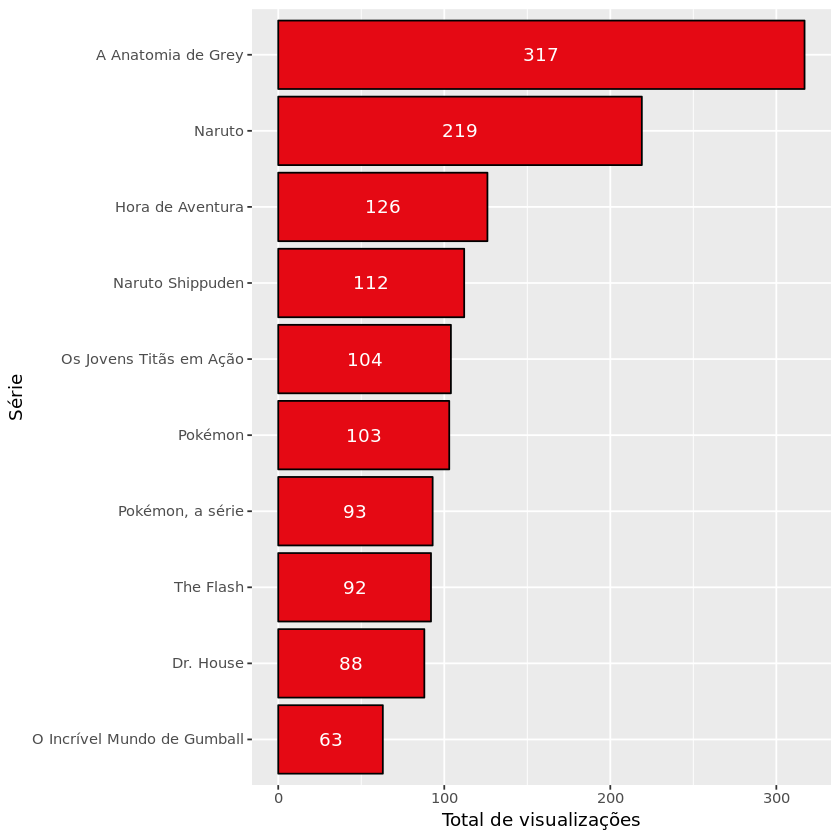

In [14]:
netflix %>% 
     filter(categoria  == "Séries") %>% 
     count(programa) %>%
     top_n(10, n) %>% 
     mutate(programa = fct_reorder(programa, n)) %>% 
     ggplot(aes(x = programa, y = n)) +
     geom_col(fill = "#e50914", color = "black") +
     geom_text(aes(label = n, y = n/2), color = "white") +
     labs(x = "Série", y = "Total de visualizações") +
     coord_flip()